In [1]:
import os
from  icecream import ic
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt 
import cv2 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/Users/carolinabernal/Documents/DiplomadoExercises/tensorflow_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
## Check the initial configuration 
# ic is the "right printer for debugging"
ic ("TF Version   ", tf.__version__)
ic ("TF Path      ", tf.__path__[0])
ic ("Keras version ", keras.__version__)
ic ("numpy version ", np.__version__)
ic("This is ic")
ic("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

ic| 'TF Version   ', tf.__version__: '2.16.2'
ic| "TF Path      ": 'TF Path      '
    tf.__path__[0]: '/Users/carolinabernal/Documents/DiplomadoExercises/tensorflow_env/lib/python3.9/site-packages/keras/api/_v2'
ic| 'Keras version ', keras.__version__: '3.8.0'
ic| 'numpy version ', np.__version__: '1.26.4'
ic| 'This is ic'
ic| "Num GPUs Available: ": 'Num GPUs Available: '
    len(tf.config.list_physical_devices('GPU')): 1


('Num GPUs Available: ', 1)

In [3]:
import torch

if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

device = torch.device("mps")

tensor([1.], device='mps:0')


In [4]:
import torchvision.models as models
import torch.nn as nn 

alexnet_py = models.alexnet(pretrained=True)

num_features = alexnet_py.classifier[6].in_features
alexnet_py.classifier[6] = nn.Linear(num_features, 10) # 10 output classes

## Save weights as a dictionary
state_dict = alexnet_py.state_dict()

## Transfer the weights to the TF model
## 1st layer 
#conv1_weights_py = state_dict['features.0.weight'].numpy()
# convert to TF format (#filters, heigh, width, channels)
#conv1_weights_tf = conv1_weights_py.transpose(2,3,1,0)

## Asign the weights to the layer
#alexnet_tf  = build_AlexNet(class_count=10)
#alexnet_tf.layers[0].set_weights(conv1_weights_tf, conv1_weights_py[0].numpy())

## convert the weights on the dictionary 
weights_dict = {k: v.cpu().detach().numpy() for k, v in alexnet_py.state_dict().items()}

/Users/carolinabernal/Documents/DiplomadoExercises/tensorflow_env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/carolinabernal/Documents/DiplomadoExercises/tensorflow_env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
weights_dict['features.0.weight']

array([[[[ 1.18639633e-01,  9.40686837e-02,  9.54351947e-02, ...,
           5.58221266e-02,  2.15752423e-02,  4.99629118e-02],
         [ 7.48824179e-02,  3.89404371e-02,  5.29788323e-02, ...,
           2.57089157e-02, -1.12988111e-02,  4.15895134e-03],
         [ 7.54248574e-02,  3.87785546e-02,  5.49304821e-02, ...,
           4.35961746e-02,  1.02249244e-02,  1.32506117e-02],
         ...,
         [ 9.31545272e-02,  1.03735171e-01,  6.75466508e-02, ...,
          -2.02765822e-01, -1.28393561e-01, -1.12197600e-01],
         [ 4.35437039e-02,  6.49163947e-02,  3.61640565e-02, ...,
          -2.02475309e-01, -1.13755308e-01, -1.07193463e-01],
         [ 4.73691896e-02,  6.25431016e-02,  2.47575156e-02, ...,
          -1.18443936e-01, -9.55668390e-02, -8.38900730e-02]],

        [[-7.26335719e-02, -5.79961278e-02, -8.06611404e-02, ...,
          -6.03040913e-04, -2.53094062e-02,  2.54710969e-02],
         [-6.90419748e-02, -6.75617307e-02, -7.63667151e-02, ...,
          -3.96157429e

In [6]:
conv1_weight_pytorch = alexnet_py.features[0].weight.data
conv1_weight_pytorch == weights_dict['features.0.weight']

tensor([[[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ...

In [7]:
np.allclose(conv1_weight_pytorch, weights_dict['features.0.weight'], atol=1e-5)

True

##### Conv weights
conv1_weight_pytorch = alexnet_py.features[0].weight.data
conv1_bias_pytorch = alexnet_py.features[0].bias.data
conv2_weight_pytorch = alexnet_py.features[3].weight.data
conv2_bias_pytorch = alexnet_py.features[3].bias.data
conv3_weight_pytorch = alexnet_py.features[6].weight.data
conv3_bias_pytorch = alexnet_py.features[6].bias.data
conv4_weight_pytorch = alexnet_py.features[8].weight.data
conv4_bias_pytorch = alexnet_py.features[8].bias.data
conv5_weight_pytorch = alexnet_py.features[10].weight.data
conv5_bias_pytorch = alexnet_py.features[10].bias.data

##### Dense (fully connected wights)
fc1_weight_pytorch = alexnet_py.classifier[1].weight.data
fc1_bias_pytorch = alexnet_py.classifier[1].bias.data
fc2_weight_pytorch = alexnet_py.classifier[4].weight.data
fc2_bias_pytorch = alexnet_py.classifier[4].bias.data
fc3_weight_pytorch = alexnet_py.classifier[6].weight.data
fc3_bias_pytorch = alexnet_py.classifier[6].bias.data


In [8]:
## Define again the alexNet model architecture 

alexnet_tf = keras.models.Sequential([
    
    keras.layers.InputLayer(input_shape=(224, 224, 3)),
    # Capa Conv2D (1)
    keras.layers.Conv2D(64, (11, 11), strides=4, padding="same", activation="relu", name="conv2d_tf_1"), #, input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Capa Conv2D (2)
    keras.layers.Conv2D(192, (5, 5), padding="same", activation="relu", name="conv2d_tf_2"),
    keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Capa Conv2D (3)
    keras.layers.Conv2D(384, (3, 3), padding="same", activation="relu", name="conv2d_tf_3"),
    
    # Capa Conv2D (4)
    keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu", name="conv2d_tf_4"),
    
    # Capa Conv2D (5)
    keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu", name="conv2d_tf_5"),
    keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Flatten
    keras.layers.Flatten(),
    
    # Capa densa (Fully Connected)
    keras.layers.Dense(4096, activation="relu", name="dense_tf_1"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation="relu", name="dense_tf_2"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax", name="dense_tf_3")
])



/Users/carolinabernal/Documents/DiplomadoExercises/tensorflow_env/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2025-03-06 23:11:31.271953: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-03-06 23:11:31.271981: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-06 23:11:31.271984: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-06 23:11:31.272004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-06 23:11:31.272020: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device:

from tensorflow.keras import layers, models

def create_alexnet(input_shape=(224, 224, 3), num_classes=1000):
    model = models.Sequential()

    # Capa 1: Conv2D + ReLU + MaxPooling
    model.add(layers.Conv2D(64, (11, 11), strides=4, padding='same', input_shape=input_shape))
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    # Capa 2: Conv2D + ReLU + MaxPooling
    model.add(layers.Conv2D(192, (5, 5), padding='same'))
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    # Capa 3, 4, 5: Conv2D + ReLU
    model.add(layers.Conv2D(384, (3, 3), padding='same'))
    model.add(layers.ReLU())
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.ReLU())
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    # Aplanar la salida
    model.add(layers.Flatten())

    # Capas totalmente conectadas (fully connected)
    model.add(layers.Dense(4096))
    model.add(layers.ReLU())
    model.add(layers.Dense(4096))
    model.add(layers.ReLU())
    model.add(layers.Dense(num_classes, activation='softmax'))  # Ajustar 'num_classes' según el número de clases

    return model

alexnet_tf = create_alexnet(input_shape=(224, 224, 3), num_classes=10)
alexnet_tf.summary()  # Para ver el resumen del modelo en Keras

In [9]:
alexnet_tf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_tf_1 (Conv2D)            │ (None, 56, 56, 64)     │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_2 (Conv2D)            │ (None, 27, 27, 192)    │       307,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_3 (Conv2D)            │ (None, 13, 13, 384)    │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_4 (Conv2D)            │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_5 (Conv2D)            │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_1 (Dense)              │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_2 (Dense)              │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_3 (Dense)              │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,044,810 (217.61 MB)

 Trainable params: 57,044,810 (217.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import numpy as np

# Crear una imagen de entrada aleatoria (por ejemplo, de tamaño 224x224x3)
input_image = np.random.rand(1, 224, 224, 3).astype(np.float32)

# Preprocesar la imagen según las necesidades de cada modelo (normalización, etc.)
# Aquí, aplicamos un ejemplo de normalización, como lo hace PyTorch (media y desviación estándar)
input_image = (input_image - np.mean(input_image)) / np.std(input_image)

# Obtener las predicciones del modelo en PyTorch
input_tensor_pytorch = torch.tensor(input_image).permute(0, 3, 1, 2)  # Ajustar dimensiones a (batch_size, channels, height, width)
alexnet_py.eval()
with torch.no_grad():
    output_pytorch = alexnet_py(input_tensor_pytorch)

# Obtener las predicciones del modelo en Keras
output_keras = alexnet_tf.predict(input_image)

# Comparar las salidas (output_pytorch vs output_keras)
print("Salida de PyTorch:", output_pytorch.numpy())
print("Salida de Keras:", output_keras)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Salida de PyTorch: [[-0.37394246 -0.17579858  0.11888441 -0.03383848  0.1342991   0.23148973
  -0.4241847   0.0797392  -0.07566792  0.19443896]]
Salida de Keras: [[0.06295206 0.13210057 0.09570504 0.1241369  0.0928833  0.07852663
  0.09557047 0.09352469 0.1198336  0.10476677]]


2025-03-06 23:11:31.628388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [11]:
print("PyTorch Weights:")
for key in weights_dict.keys():
    print(key)

PyTorch Weights:
features.0.weight
features.0.bias
features.3.weight
features.3.bias
features.6.weight
features.6.bias
features.8.weight
features.8.bias
features.10.weight
features.10.bias
classifier.1.weight
classifier.1.bias
classifier.4.weight
classifier.4.bias
classifier.6.weight
classifier.6.bias


In [12]:
print("TensorFlow layers:")
for layer in alexnet_tf.layers:
    print(layer.name)

TensorFlow layers:
conv2d_tf_1
max_pooling2d
conv2d_tf_2
max_pooling2d_1
conv2d_tf_3
conv2d_tf_4
conv2d_tf_5
max_pooling2d_2
flatten
dense_tf_1
dropout
dense_tf_2
dropout_1
dense_tf_3


In [13]:
# Manual layer map to  PyTorch -> TensorFlow
layer_map = {
    "features.0.weight": "conv2d_tf_1",
    "features.0.bias": "conv2d_tf_1",
    "features.3.weight": "conv2d_tf_2",
    "features.3.bias": "conv2d_tf_2",
    "features.6.weight": "conv2d_tf_3",
    "features.6.bias": "conv2d_tf_3",
    "features.8.weight": "conv2d_tf_4",
    "features.8.bias": "conv2d_tf_4",
    "features.10.weight": "conv2d_tf_5",
    "features.10.bias": "conv2d_tf_5",
    "classifier.1.weight": "dense_tf_1",
    "classifier.1.bias": "dense_tf_1",
    "classifier.4.weight": "dense_tf_2",
    "classifier.4.bias": "dense_tf_2",
    "classifier.6.weight": "dense_tf_3",
    "classifier.6.bias": "dense_tf_3",
} 

In [14]:
layer_map.items()

dict_items([('features.0.weight', 'conv2d_tf_1'), ('features.0.bias', 'conv2d_tf_1'), ('features.3.weight', 'conv2d_tf_2'), ('features.3.bias', 'conv2d_tf_2'), ('features.6.weight', 'conv2d_tf_3'), ('features.6.bias', 'conv2d_tf_3'), ('features.8.weight', 'conv2d_tf_4'), ('features.8.bias', 'conv2d_tf_4'), ('features.10.weight', 'conv2d_tf_5'), ('features.10.bias', 'conv2d_tf_5'), ('classifier.1.weight', 'dense_tf_1'), ('classifier.1.bias', 'dense_tf_1'), ('classifier.4.weight', 'dense_tf_2'), ('classifier.4.bias', 'dense_tf_2'), ('classifier.6.weight', 'dense_tf_3'), ('classifier.6.bias', 'dense_tf_3')])

In [15]:
for torch_key, tf_name in layer_map.items():
    
    if tf_name in [layer.name for layer in alexnet_tf.layers]:
        layer = alexnet_tf.get_layer(tf_name)
        torch_weight = weights_dict[torch_key]

        # If it's convolutional then transport the weights from PyTorch to TensorFlow
        if "conv2d" in tf_name and "weight" in torch_key:
            print(f"Transformation of {torch_key} to {tf_name} (Conv2D)")

            # Verify is torch_weight is an Numpy ndarray and convert to PyTorch tensor if needed 
            
            if isinstance(torch_weight, np.ndarray):
                torch_weight = torch.from_numpy(torch_weight)

            # Permute the tensor to match the TF format #(2, 3, 1, 0)
            torch_weight = torch_weight.permute(2, 3, 1, 0).contiguous().cpu().numpy()  # [H, W, in_channels, out_channels]

        # For Dense (Fully Connected),make sure the dimensions match 
        elif "dense" in tf_name:
            print(f"Transformation of {torch_key} to {tf_name} (Dense)")

            expected_shape = layer.get_weights()[0].shape  # Keras Shape

            if "weight" in torch_key:  
                torch_weight = torch_weight.T  # Transpose to match TF format 
                assert torch_weight.shape == expected_shape, f"Incorrect Dimention {torch_weight.shape}, expected {expected_shape}"
            
            elif "bias" in torch_key:  
                expected_shape = layer.get_weights()[1].shape  # Bias expected shape
                assert torch_weight.shape == expected_shape, f"Incorrect Dimention {torch_weight.shape}, expected {expected_shape}"
            
        # If torch_weight is an NumPy ndarray we used as it is (just verifiying correct structure)
        if isinstance(torch_weight, np.ndarray):
            torch_weight = torch_weight 

        # Get the weights for each layer in Keras
        layer_weights = layer.get_weights()

        # Asign the weights for each layer 
        if len(layer_weights) == 2:  # weights and bias 
            if "bias" in torch_key:
                layer.set_weights([layer_weights[0], torch_weight])  # Keep weights, assign bias
            else:
                layer.set_weights([torch_weight, layer_weights[1]])  # Assign weights, Keep bias
        elif len(layer_weights) == 1:  # Only weights (no bias)
            layer.set_weights([torch_weight])

        print(f"✔ Weights successfully assigned to {tf_name} from {torch_key}")


Transformation of features.0.weight to conv2d_tf_1 (Conv2D)
✔ Weights successfully assigned to conv2d_tf_1 from features.0.weight
✔ Weights successfully assigned to conv2d_tf_1 from features.0.bias
Transformation of features.3.weight to conv2d_tf_2 (Conv2D)
✔ Weights successfully assigned to conv2d_tf_2 from features.3.weight
✔ Weights successfully assigned to conv2d_tf_2 from features.3.bias
Transformation of features.6.weight to conv2d_tf_3 (Conv2D)
✔ Weights successfully assigned to conv2d_tf_3 from features.6.weight
✔ Weights successfully assigned to conv2d_tf_3 from features.6.bias
Transformation of features.8.weight to conv2d_tf_4 (Conv2D)
✔ Weights successfully assigned to conv2d_tf_4 from features.8.weight
✔ Weights successfully assigned to conv2d_tf_4 from features.8.bias
Transformation of features.10.weight to conv2d_tf_5 (Conv2D)
✔ Weights successfully assigned to conv2d_tf_5 from features.10.weight
✔ Weights successfully assigned to conv2d_tf_5 from features.10.bias
Transfo

In [16]:


# Name of the layer to verify
layer_name = "dense_tf_3"

# Keras layer
keras_layer = alexnet_tf.get_layer(layer_name)

# Get the weights assign to that layer
keras_weights = keras_layer.get_weights()[0]  # Weights
keras_biases = keras_layer.get_weights()[1]   # Bias

# Get the original weights from  PyTorch (before being assigned)
# Remember the dictionary dense matches classifier and conv matches features 
# also Dense layers needs .T but Conv need .transpose(2, 3, 1, 0)
torch_weights = alexnet_py.state_dict()["classifier.6.weight"].cpu().numpy().T
torch_biases = alexnet_py.state_dict()["classifier.6.bias"].cpu().numpy()

# Compare the weights
weights_match = np.allclose(keras_weights, torch_weights, atol=1e-5)
biases_match = np.allclose(keras_biases, torch_biases, atol=1e-5)

print(f"Wights match? {weights_match}")
print(f"Bias match? {biases_match}")


Wights match? True
Bias match? True


In [17]:
# Name of the layer to verify
layer_name = "conv2d_tf_1"

# Keras layer
keras_layer = alexnet_tf.get_layer(layer_name)

# Get the weights assign to that layer
keras_weights = keras_layer.get_weights()[0]  # Weights
keras_biases = keras_layer.get_weights()[1]   # Bias

# Get the original weights from  PyTorch (before being assigned)
# Remember the dictionary dense matches classifier and conv matches features 
# also Dense layers needs .T but Conv need .transpose(2, 3, 1, 0)
torch_weights = alexnet_py.state_dict()["features.0.weight"].cpu().numpy().transpose(2, 3, 1, 0)
torch_biases = alexnet_py.state_dict()["features.0.bias"].cpu().numpy()

# Compare the weights
weights_match = np.allclose(keras_weights, torch_weights, atol=1e-5)
biases_match = np.allclose(keras_biases, torch_biases, atol=1e-5)

print(f"Wights match? {weights_match}")
print(f"Bias match? {biases_match}")

Wights match? True
Bias match? True


In [18]:
keras_weights

array([[[[ 1.18639633e-01, -1.99498818e-03, -5.17016873e-02, ...,
           9.09483060e-03,  4.57116170e-03, -9.50807482e-02],
         [-7.26335719e-02,  2.39646584e-02,  3.90126258e-02, ...,
          -1.14952847e-02, -9.05964375e-02, -9.87603739e-02],
         [-2.35964879e-02, -3.64879370e-02,  1.15350978e-02, ...,
          -5.42088179e-03, -1.36933744e-01, -1.05800383e-01]],

        [[ 9.40686837e-02,  2.92619457e-03,  1.38248885e-02, ...,
           1.48228928e-02,  4.69079837e-02,  5.65810613e-02],
         [-5.79961278e-02,  2.27397121e-02,  6.43110136e-03, ...,
           2.49172631e-03, -5.14846742e-02,  6.26348108e-02],
         [-2.12576496e-03,  6.63318206e-03, -2.69930717e-02, ...,
          -1.76476373e-03, -7.93410987e-02,  5.43808490e-02]],

        [[ 9.54351947e-02,  4.82124053e-02,  9.05143283e-03, ...,
           4.73743724e-03, -1.60749089e-02,  1.40157178e-01],
         [-8.06611404e-02,  5.75857051e-03, -3.17103532e-03, ...,
          -8.24001618e-03, -1.6459

In [19]:
torch_weights

array([[[[ 1.18639633e-01, -1.99498818e-03, -5.17016873e-02, ...,
           9.09483060e-03,  4.57116170e-03, -9.50807482e-02],
         [-7.26335719e-02,  2.39646584e-02,  3.90126258e-02, ...,
          -1.14952847e-02, -9.05964375e-02, -9.87603739e-02],
         [-2.35964879e-02, -3.64879370e-02,  1.15350978e-02, ...,
          -5.42088179e-03, -1.36933744e-01, -1.05800383e-01]],

        [[ 9.40686837e-02,  2.92619457e-03,  1.38248885e-02, ...,
           1.48228928e-02,  4.69079837e-02,  5.65810613e-02],
         [-5.79961278e-02,  2.27397121e-02,  6.43110136e-03, ...,
           2.49172631e-03, -5.14846742e-02,  6.26348108e-02],
         [-2.12576496e-03,  6.63318206e-03, -2.69930717e-02, ...,
          -1.76476373e-03, -7.93410987e-02,  5.43808490e-02]],

        [[ 9.54351947e-02,  4.82124053e-02,  9.05143283e-03, ...,
           4.73743724e-03, -1.60749089e-02,  1.40157178e-01],
         [-8.06611404e-02,  5.75857051e-03, -3.17103532e-03, ...,
          -8.24001618e-03, -1.6459

In [20]:
print("PyTorch weights (first 15 values):", torch_weights.flatten()[:15])
print("Keras weights (first 15 values):", keras_weights.flatten()[:15])


PyTorch weights (first 15 values): [ 0.11863963 -0.00199499 -0.05170169 -0.00720005  0.11755756  0.06961104
 -0.02378549 -0.0480403   0.06102453  0.01667745  0.02307683  0.0656734
  0.08397776  0.0106233  -0.02196683]
Keras weights (first 15 values): [ 0.11863963 -0.00199499 -0.05170169 -0.00720005  0.11755756  0.06961104
 -0.02378549 -0.0480403   0.06102453  0.01667745  0.02307683  0.0656734
  0.08397776  0.0106233  -0.02196683]


In [21]:
alexnet_tf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_tf_1 (Conv2D)            │ (None, 56, 56, 64)     │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_2 (Conv2D)            │ (None, 27, 27, 192)    │       307,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_3 (Conv2D)            │ (None, 13, 13, 384)    │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_4 (Conv2D)            │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_5 (Conv2D)            │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_1 (Dense)              │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_2 (Dense)              │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_3 (Dense)              │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,044,810 (217.61 MB)

 Trainable params: 57,044,810 (217.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:

# Show the weights for each layer in Keras
for layer in alexnet_tf.layers:
    weights = layer.get_weights()
    print(f"Layer: {layer.name} | Type: {layer.__class__.__name__}")
    for i, w in enumerate(weights):
        print(f"  - Weight {i}: Shape {w.shape}")


Layer: conv2d_tf_1 | Type: Conv2D
  - Weight 0: Shape (11, 11, 3, 64)
  - Weight 1: Shape (64,)
Layer: max_pooling2d | Type: MaxPooling2D
Layer: conv2d_tf_2 | Type: Conv2D
  - Weight 0: Shape (5, 5, 64, 192)
  - Weight 1: Shape (192,)
Layer: max_pooling2d_1 | Type: MaxPooling2D
Layer: conv2d_tf_3 | Type: Conv2D
  - Weight 0: Shape (3, 3, 192, 384)
  - Weight 1: Shape (384,)
Layer: conv2d_tf_4 | Type: Conv2D
  - Weight 0: Shape (3, 3, 384, 256)
  - Weight 1: Shape (256,)
Layer: conv2d_tf_5 | Type: Conv2D
  - Weight 0: Shape (3, 3, 256, 256)
  - Weight 1: Shape (256,)
Layer: max_pooling2d_2 | Type: MaxPooling2D
Layer: flatten | Type: Flatten
Layer: dense_tf_1 | Type: Dense
  - Weight 0: Shape (9216, 4096)
  - Weight 1: Shape (4096,)
Layer: dropout | Type: Dropout
Layer: dense_tf_2 | Type: Dense
  - Weight 0: Shape (4096, 4096)
  - Weight 1: Shape (4096,)
Layer: dropout_1 | Type: Dropout
Layer: dense_tf_3 | Type: Dense
  - Weight 0: Shape (4096, 10)
  - Weight 1: Shape (10,)


In [23]:
# Show the weights for each layer in Pytorch
for name, param in alexnet_py.state_dict().items():
    print(f"Layer: {name} | Shape: {param.shape}")

Layer: features.0.weight | Shape: torch.Size([64, 3, 11, 11])
Layer: features.0.bias | Shape: torch.Size([64])
Layer: features.3.weight | Shape: torch.Size([192, 64, 5, 5])
Layer: features.3.bias | Shape: torch.Size([192])
Layer: features.6.weight | Shape: torch.Size([384, 192, 3, 3])
Layer: features.6.bias | Shape: torch.Size([384])
Layer: features.8.weight | Shape: torch.Size([256, 384, 3, 3])
Layer: features.8.bias | Shape: torch.Size([256])
Layer: features.10.weight | Shape: torch.Size([256, 256, 3, 3])
Layer: features.10.bias | Shape: torch.Size([256])
Layer: classifier.1.weight | Shape: torch.Size([4096, 9216])
Layer: classifier.1.bias | Shape: torch.Size([4096])
Layer: classifier.4.weight | Shape: torch.Size([4096, 4096])
Layer: classifier.4.bias | Shape: torch.Size([4096])
Layer: classifier.6.weight | Shape: torch.Size([10, 4096])
Layer: classifier.6.bias | Shape: torch.Size([10])


In [24]:
# Get the weights of the first conv layer from Pytorch 
conv1_weights = alexnet_py.state_dict()["features.0.weight"]
conv1_biases = alexnet_py.state_dict()["features.0.bias"]

print("Weights from Conv1 in PyTorch:", conv1_weights.shape)
print("Biases from Conv1 in PyTorch:", conv1_biases.shape)


Weights from Conv1 in PyTorch: torch.Size([64, 3, 11, 11])
Biases from Conv1 in PyTorch: torch.Size([64])


In [25]:
# Get the weights of the first conv layer from Keras 
conv1_layer = alexnet_tf.get_layer("conv2d_tf_1")  # Layer name from Keras
conv1_weights, conv1_biases = conv1_layer.get_weights()

print("Weights from Conv1 in Keras:", conv1_weights.shape)
print("Biases from Conv1 in Keras:", conv1_biases.shape)


Weights from Conv1 in Keras: (11, 11, 3, 64)
Biases from Conv1 in Keras: (64,)


In [26]:

# Transpose the weights from PyTorch to match Keras format
torch_weights = alexnet_py.state_dict()["features.0.weight"].cpu().numpy()
torch_weights = np.transpose(torch_weights, (2, 3, 1, 0))  #  Keras format (2, 3, 1, 0)

# Keras weights
keras_weights = alexnet_tf.get_layer("conv2d_tf_1").get_weights()[0]

# Compare
print("Weigths match?", np.allclose(keras_weights, torch_weights, atol=1e-5))


Weigths match? True


In [27]:
feature_0 = alexnet_py.state_dict()["features.0.weight"].cpu().numpy()
np.transpose(feature_0, (2, 3, 1, 0)) #(2, 3, 1, 0)

array([[[[ 1.18639633e-01, -1.99498818e-03, -5.17016873e-02, ...,
           9.09483060e-03,  4.57116170e-03, -9.50807482e-02],
         [-7.26335719e-02,  2.39646584e-02,  3.90126258e-02, ...,
          -1.14952847e-02, -9.05964375e-02, -9.87603739e-02],
         [-2.35964879e-02, -3.64879370e-02,  1.15350978e-02, ...,
          -5.42088179e-03, -1.36933744e-01, -1.05800383e-01]],

        [[ 9.40686837e-02,  2.92619457e-03,  1.38248885e-02, ...,
           1.48228928e-02,  4.69079837e-02,  5.65810613e-02],
         [-5.79961278e-02,  2.27397121e-02,  6.43110136e-03, ...,
           2.49172631e-03, -5.14846742e-02,  6.26348108e-02],
         [-2.12576496e-03,  6.63318206e-03, -2.69930717e-02, ...,
          -1.76476373e-03, -7.93410987e-02,  5.43808490e-02]],

        [[ 9.54351947e-02,  4.82124053e-02,  9.05143283e-03, ...,
           4.73743724e-03, -1.60749089e-02,  1.40157178e-01],
         [-8.06611404e-02,  5.75857051e-03, -3.17103532e-03, ...,
          -8.24001618e-03, -1.6459

In [28]:
# Save the model on a HDF5 file
alexnet_tf.save('alexnet_pretrained_wpytoch_forKeras.h5')


In [29]:
alexnet_tf.save('alexnet_pretrained_wpytoch_forKeras.keras')

In [30]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [31]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Training configuration 
batch_size = 128

## Preprosesing 
## We'll need to define some functions to be able to preproses the data and ensure the data utilized
## is within the appropiate format for our model and use case. 


## Function to resize the image as AlexNet model expects 224x224 images
def resize_image(image, image_height=224, image_width=224):
    ##resize images to the appropriate dimensions for AlexNet
    ## param image_width
    ## param image_height 
    ## param image image to resize
    ## return  resized image
    
    return tf.image.resize(image, [image_height, image_width])

In [32]:
## Preprosesing the images

# Normalization values from ImageNet
IMAGENET_MEAN = np.array([0.485, 0.456, 0.406], dtype=np.float32)
IMAGENET_STD = np.array([0.229, 0.224, 0.225], dtype=np.float32)

def preprocess_image(image, label):
  
    # preprocessing function used in test dataset pipeline

  image = image / 255 # Normalize a [0,1]
  image = resize_image(image) # resize to 224x224

  # Normalize the image with  ImageNet (PyTorch)
  image = (image - IMAGENET_MEAN) / IMAGENET_STD

  # label sparse to categorical
  label = tf.one_hot(tf.squeeze(label), depth=10)

  return (image, label)

### Create test , validation and training sets 

In [33]:
## Tensorflow gas skme methods and procedures to transform the dataset into a data representation TF can work with.
## Let's use tf.data.Dataset.from_tensor_slices , this method takes the train, test, and validation dataset partitions
## and returns a corresponding TensorFlow Dataset representation.
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds  = tf.data.Dataset.from_tensor_slices((test_images,test_labels))

2025-03-06 23:11:34.242421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


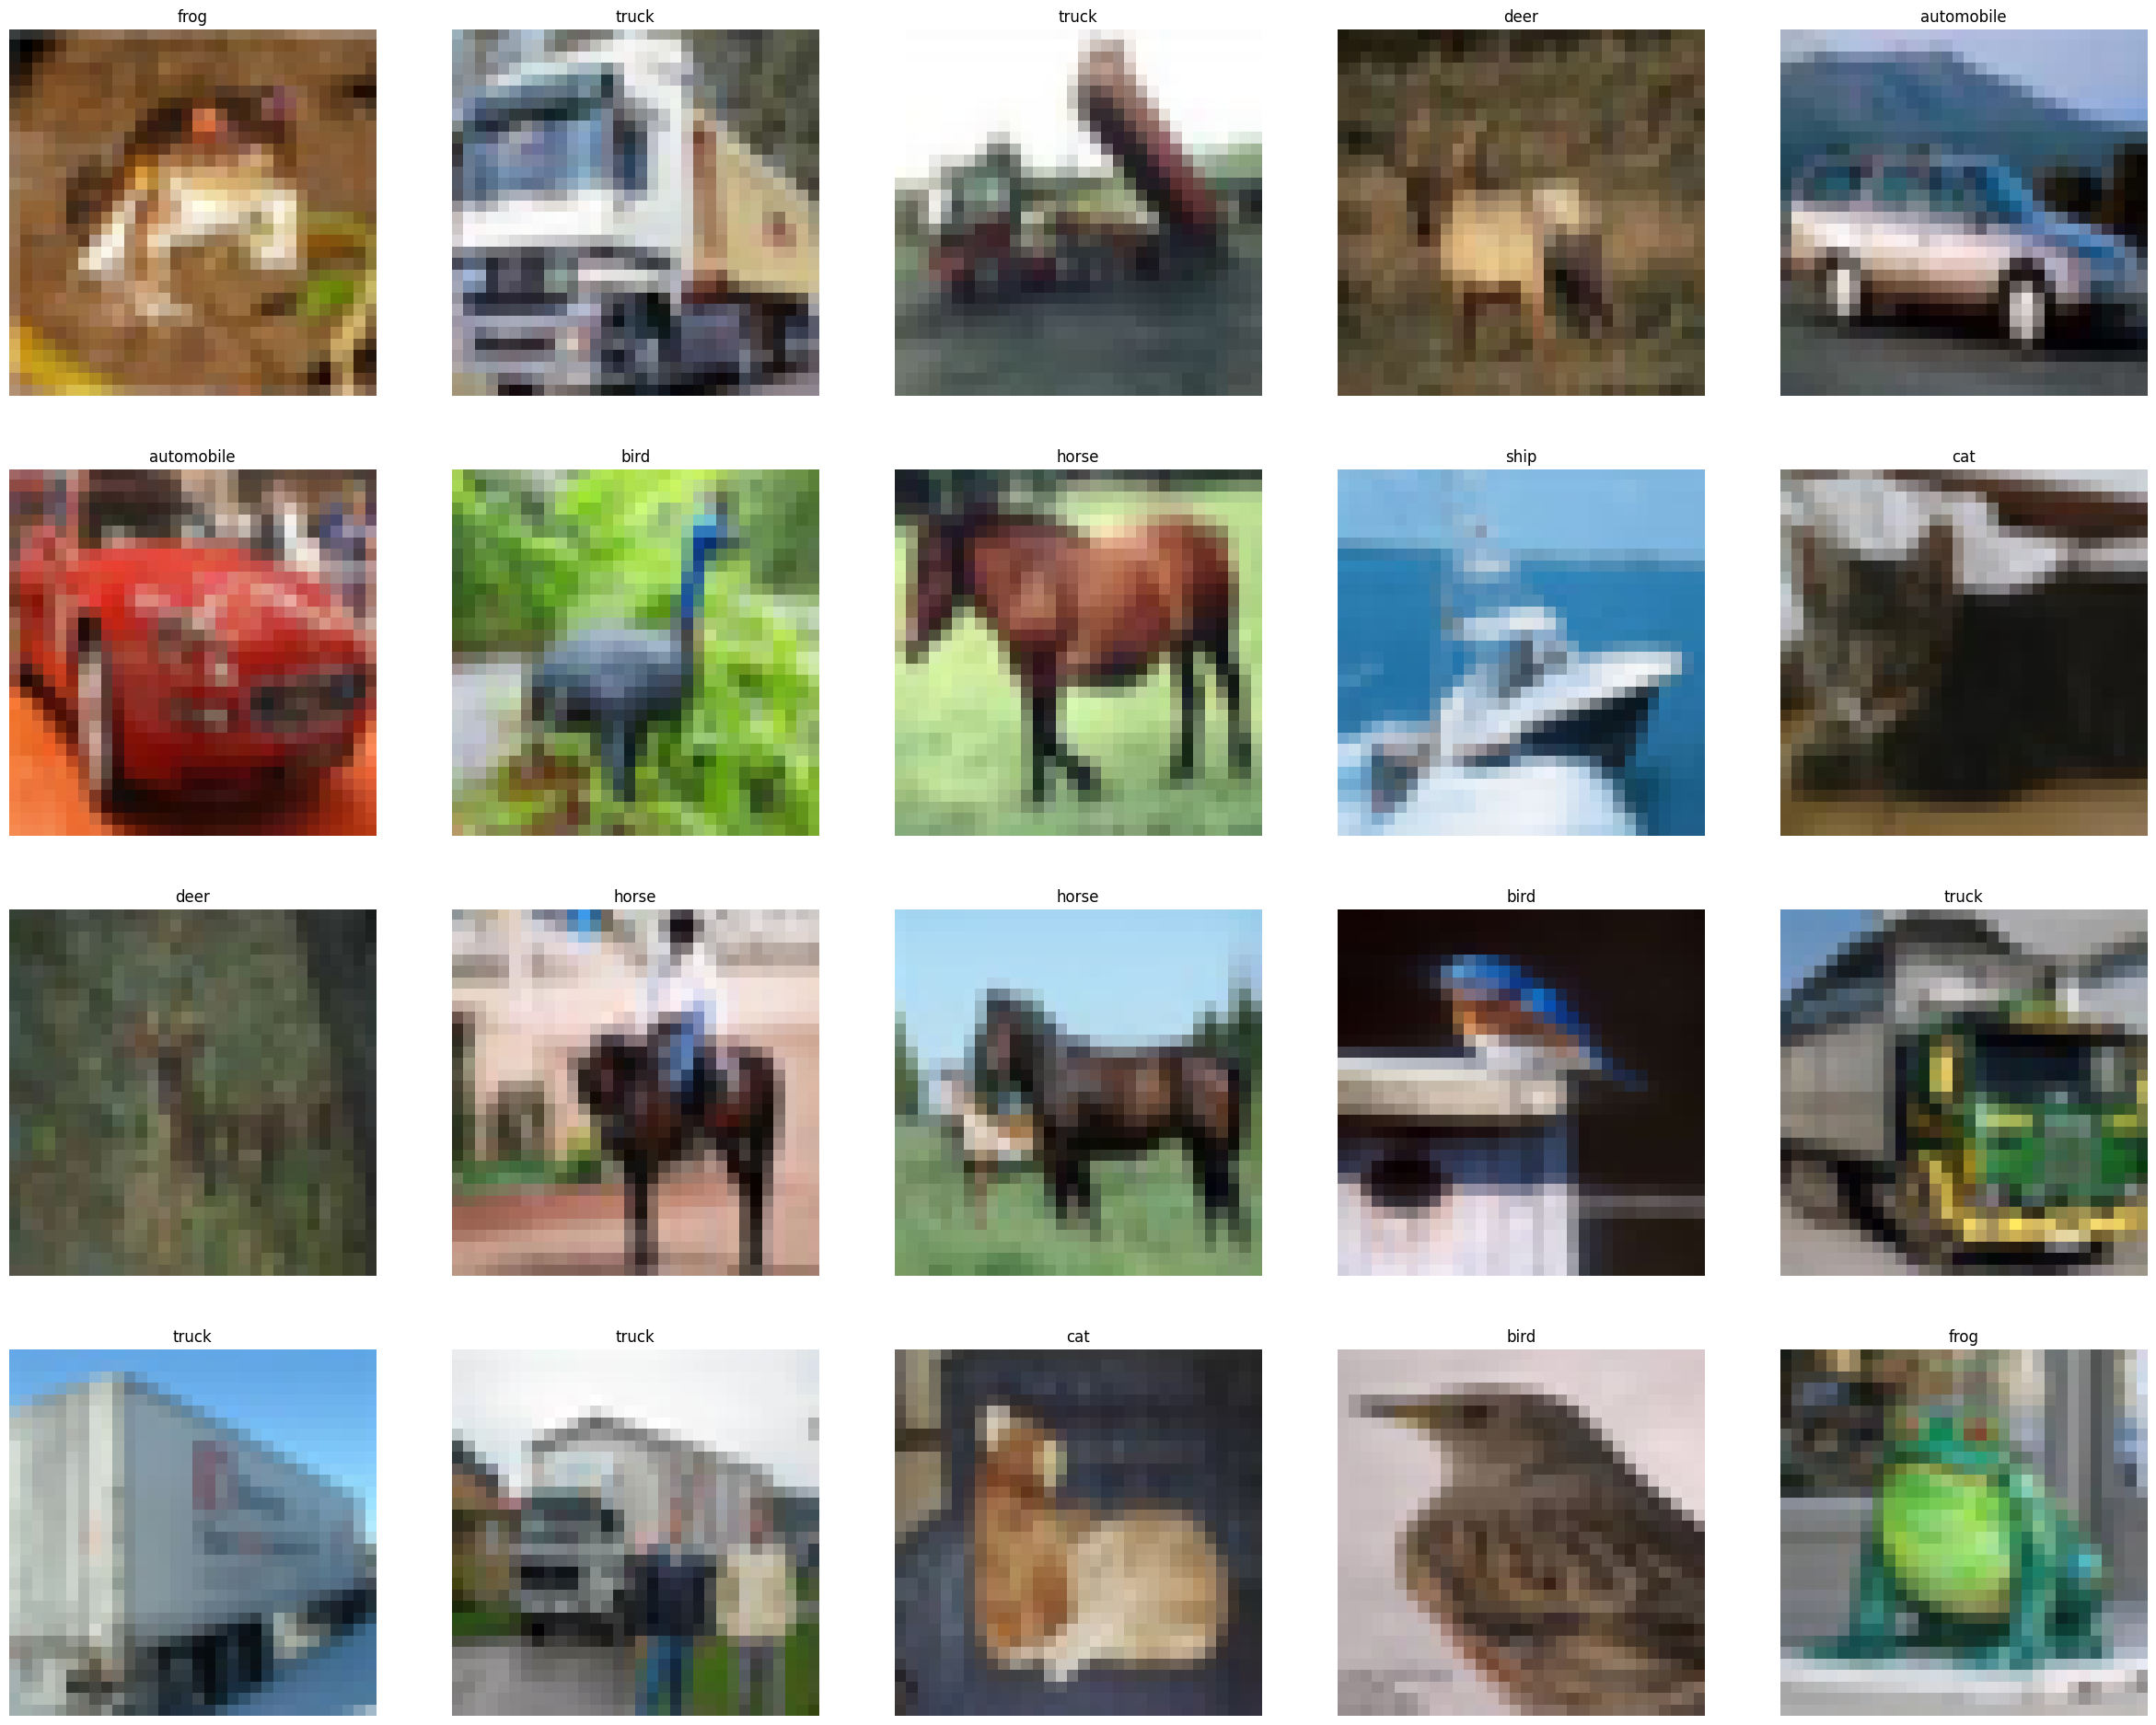

In [34]:
## Let's take a look on the images, as defined above we'll need to prepocess the data from CIFAR-10
## to a format AlexNet can work with

plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    #print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(class_names[label.numpy()[0]])
    plt.axis('off')


In [35]:
## Check the size for the training and testing dataset
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size  = tf.data.experimental.cardinality(test_ds).numpy()

print('Train size:',train_ds_size)  ##  50000
print('Test size:',test_ds_size)    ##  10000

Train size: 50000
Test size: 10000


In [36]:
## Let's also get the some info about the data 

print("Images Raw info:")
print("Shape of train images: {}".format(train_images.shape))
print("Shape of train labels: {}".format(train_labels.shape))
print("Shape of test images: {}".format(test_images.shape))
print("Shape of test labels: {}".format(test_labels.shape))
print("Data type: ", train_images.dtype)

Images Raw info:
Shape of train images: (50000, 32, 32, 3)
Shape of train labels: (50000, 1)
Shape of test images: (10000, 32, 32, 3)
Shape of test labels: (10000, 1)
Data type:  uint8


TF Dataset: 
(128, 224, 224, 3)
(128, 10)


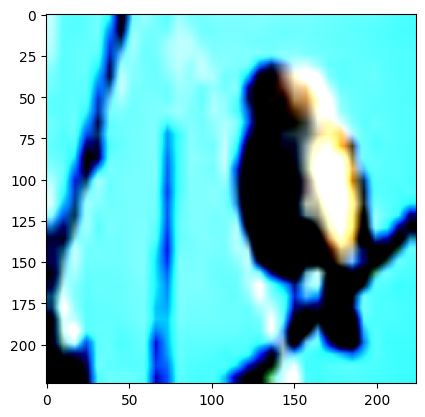

In [37]:
## Let's define the test, validation and training set 

##
split = int(0.1 * len(train_images)) # split 10% to validation
valid_images = train_images[:split]
train_images = train_images[split:]

valid_labels = train_labels[:split]
train_labels = train_labels[split:]


## Training set
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels)) # defined above 
train_ds = (
    train_ds 
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .shuffle(buffer_size=test_ds_size) # suffle the data to avoid/prevent bias
    .batch(batch_size,drop_remainder=True) # drop_reminder to dismiss the last batch if the size is small 
    .prefetch(tf.data.AUTOTUNE) # prefetch load  TF adjust automatically the pre-loaded data 
    ## Prefetching is a technique used to optimize data access by loading data into memory before it's actually needed.
)

## Test set
test_ds =  tf.data.Dataset.from_tensor_slices((train_images,train_labels)) # defined above 
test_ds = (
    test_ds
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .shuffle(buffer_size=test_ds_size) # suffle the data to avoid/prevent bias
    .batch(batch_size,drop_remainder=True) # drop_reminder to dismiss the last batch if the size is small 
    .prefetch(tf.data.AUTOTUNE) # prefetch load  TF adjust automatically the pre-loaded data 
    ## Prefetching is a technique used to optimize data access by loading data into memory before it's actually needed. 
)

##  Validation set
valid_ds = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels))
valid_ds = (
    valid_ds
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .batch(batch_size,drop_remainder=True)
    .prefetch(tf.data.AUTOTUNE)
)

## Show Size of TF Dataset
print("TF Dataset: ")
for image, label in train_ds:
  print(image.shape)
  print(label.shape)
  break

## Show a random image 
sample_ds = train_ds.shuffle(10).take(1).as_numpy_iterator()
it = iter(sample_ds)
fig, axes = plt.subplots()
axes = plt.imshow(it.next()[0][0])
plt.show()

Since the model pretrained from pytorch is trained using CIFAR-100 instead of CIFAR-10 we need to modify the last layer to match the class_count=10 from CIFAR_10, by doing so we have to modify the last layer by changing to a new Dense layer (not trained) and for training the model we have 2 options.

1.  Train again the model for all the layers.
2.  Freeze all the layer except from the last one and then re-tain the last layer. 

In [38]:
# Load the pretrained model 
alexnet_tf_new = tf.keras.models.load_model('alexnet_pretrained_wpytoch_forKeras.keras')
 
alexnet_tf_new.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_tf_1 (Conv2D)            │ (None, 56, 56, 64)     │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_2 (Conv2D)            │ (None, 27, 27, 192)    │       307,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_3 (Conv2D)            │ (None, 13, 13, 384)    │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_4 (Conv2D)            │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_5 (Conv2D)            │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_1 (Dense)              │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_2 (Dense)              │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_3 (Dense)              │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,044,810 (217.61 MB)

 Trainable params: 57,044,810 (217.61 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
for layer in alexnet_tf_new.layers[:-1]:
   layer.trainable = False  # Froze the layers
#    x = layer(x)

In [40]:
alexnet_tf_new.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_tf_1 (Conv2D)            │ (None, 56, 56, 64)     │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_2 (Conv2D)            │ (None, 27, 27, 192)    │       307,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_3 (Conv2D)            │ (None, 13, 13, 384)    │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_4 (Conv2D)            │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_5 (Conv2D)            │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_1 (Dense)              │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_2 (Dense)              │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_3 (Dense)              │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,044,810 (217.61 MB)

 Trainable params: 40,970 (160.04 KB)

 Non-trainable params: 57,003,840 (217.45 MB)

In [41]:
alexnet_tf_new.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:
alexnet_tf_new.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_tf_1 (Conv2D)            │ (None, 56, 56, 64)     │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_2 (Conv2D)            │ (None, 27, 27, 192)    │       307,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_3 (Conv2D)            │ (None, 13, 13, 384)    │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_4 (Conv2D)            │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_tf_5 (Conv2D)            │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_1 (Dense)              │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_2 (Dense)              │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_tf_3 (Dense)              │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,044,810 (217.61 MB)

 Trainable params: 40,970 (160.04 KB)

 Non-trainable params: 57,003,840 (217.45 MB)

In [43]:
alexnet_tf_new.fit(train_ds, validation_data=valid_ds,epochs=20)

Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.1329 - loss: 20.3275 - val_accuracy: 0.2468 - val_loss: 8.4724
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.2026 - loss: 11.2144 - val_accuracy: 0.2782 - val_loss: 16.8468
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.2051 - loss: 11.9190 - val_accuracy: 0.2610 - val_loss: 7.0307
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 26s 73ms/step - accuracy: 0.2282 - loss: 9.2181 - val_accuracy: 0.2979 - val_loss: 4.3124
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.2260 - loss: 9.2383 - val_accuracy: 0.1494 - val_loss: 12.2802
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.2176 - loss: 10.8441 - val_accuracy: 0.2808 - val_loss: 5.5924
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.2324 - loss: 9.2506 - val_accuracy: 0.3253 - val_loss: 4.2030
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.2223 - loss: 9.9

In [44]:
# Unfreeze the layers
for layer in alexnet_tf_new.layers:
    layer.trainable = True

# Compile again with ompilar lower learning rate for  fine-tuning
alexnet_tf_new.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

# Training all the model  (include fine-tuning)
alexnet_tf_new.fit(train_ds, validation_data=valid_ds,epochs=20)


Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 97s 269ms/step - accuracy: 0.3860 - loss: 6.7328 - val_accuracy: 0.5881 - val_loss: 28.4603
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 95s 269ms/step - accuracy: 0.3048 - loss: 530.4138 - val_accuracy: 0.4912 - val_loss: 517.4256
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 95s 269ms/step - accuracy: 0.3148 - loss: 2100.3696 - val_accuracy: 0.5459 - val_loss: 645.3294
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 96s 271ms/step - accuracy: 0.3569 - loss: 2212.8298 - val_accuracy: 0.5577 - val_loss: 764.5931
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 96s 268ms/step - accuracy: 0.3809 - loss: 2184.4048 - val_accuracy: 0.5693 - val_loss: 768.8715
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 96s 269ms/step - accuracy: 0.4061 - loss: 2087.3032 - val_accuracy: 0.5931 - val_loss: 698.9427
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 96s 271ms/step - accuracy: 0.4389 - loss: 1819.7129 - val_accuracy: 0.6024 - val_loss: 684.1219
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 95s 268ms/ste